<a href="https://colab.research.google.com/github/choudhs/Correlating-Stock-Returns/blob/master/Law2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/


In [ ]:
cd drive/My\ Drive

/content/drive/My Drive


In [ ]:
cd AiLanthus\ SAAS\ DC\ Project

/content/drive/My Drive/AiLanthus SAAS DC Project


In [ ]:
from gensim.models import Word2Vec
from datascience import * 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import regex as re
import gensim
import seaborn as sns
from scipy.stats import chisquare, ks_2samp
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
from gensim.models.word2vec import Word2Vec
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, mean_absolute_error
from sklearn.utils import check_array
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.tree import export_graphviz
from IPython.display import Image
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import ClusterCentroids
import pydot

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
glove_input_file = "/content/drive/My Drive/AiLanthus SAAS DC Project/data/vectors/law2vec.200d.txt"
word2vec_output_file = 'law2vec.200d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)
filename = "/content/drive/My Drive/AiLanthus SAAS DC Project/law2vec.200d.txt.word2vec"
model = KeyedVectors.load_word2vec_format(filename, binary=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


# Setting Up

In [ ]:
data = pd.read_csv('fullMerged.csv')
data = data[data['Patent Text'].notnull()]
data.head()

,Case_name,Case_number,Court,Patent/Application,Claims,Eligibility_under_§_101_(abstract),Eligiblity_under_§_103,Date,Rationale,Fenwick_Coding,1st Patent Eligibility 101,1st Patent Algorithm,Test Result,Invalid False Positive,Invalid True Positive,Invalid False Negative,Invalid True Negative,Valid False Positive,Valid True Positive,Valid False Negative,Kind Code,Party 1,Party 2,w_US,Heading Text,Number of headings,DETAILED in heading,Patent Text,Number of Paragraphs,Figure Count,Digit/Decimal Count,Excluding Phrase Count,Semicolon Count,Number of Backward Citations,Number of Forward Citations,Wherein Count,Said Count,Examiner Name,Examiner Rate,Examiner Count
0,"ULTRAMERCIAL, INC., AND ULTRAMERCIAL, LLC,",2010-1544,Court of Appeals,7346545,"ULTRAMERCIAL, INC., AND ULTRAMERCIAL, LLC,",0.0,NaN,10/14/2014,Abstract,Abstract Idea: An Idea of Itself,No,No,PASS,No,Yes,No,No,No,No,No,NaN,"ULTRAMERCIAL, INC.","ULTRAMERCIAL, LLC,",US7346545,CLAIM OF PRIORITY-Heading-BACKGROUND OF THE IN...,5,1,The present application claims the benefit of ...,64,17,189,332,28,NaN,859412202.0,1.0,18.0,ROBERT POND,0.849624,2660.0
1,"Hikansut LLC, v. United States",COFC-1-12-cv-00303,In the United States Court of Federal Claims,7175722,"Hikansut LLC, v. United States",1.0,NaN,10/18/2016,Not Abstract,Not Abstract,Yes,Yes,PASS,No,No,No,Yes,No,Yes,No,NaN,"Hikansut LLC,",United States,US7175722,REFERENCE TO RELATED APPLICATION-Heading-FIELD...,6,1,This application claims priority to and the be...,94,48,481,729,13,NaN,975444364.0,36.0,0.0,SIKYIN IP,0.883900,7149.0
2,"Tenon & Groove, LLC, v. Plusgrade S.E.C.",12-1118-GMS-SRF,IN THE UNITED STATES DISTRICT COURT\n FOR THE ...,7418409,"Tenon & Groove, LLC, v. Plusgrade S.E.C.",0.0,NaN,03/03/2015,Abstract,Abstract Idea: Implemented on Generic Computer,No,No,PASS,No,Yes,No,No,No,No,No,NaN,"Tenon & Groove, LLC,",Plusgrade S.E.C.,US7418409,CROSS-REFERENCE TO RELATED APPLICATION AND PRI...,12,1,"Applicant hereby claims the benefit, under 35 ...",227,84,599,1247,43,NaN,806557070.0,2.0,2.0,WILLIAM ALLEN,0.861180,2406.0
3,"Tenon & Groove, LLC, v. Plusgrade S.E.C.",12-1118-GMS-SRF,IN THE UNITED STATES DISTRICT COURT\n FOR THE ...,8145536,"Tenon & Groove, LLC, v. Plusgrade S.E.C.",0.0,NaN,03/03/2015,Abstract,Abstract Idea: Implemented on Generic Computer,No,No,PASS,No,Yes,No,No,No,No,No,NaN,"Tenon & Groove, LLC,",Plusgrade S.E.C.,US8145536,CROSS-REFERENCE TO RELATED APPLICATIONS AND PR...,6,1,"This application is a continuation-in-part, an...",1334,356,3488,11766,188,NaN,NaN,48.0,810.0,WILLIAM ALLEN,0.861180,2406.0
4,"PricePlay.com, v. AOL Advertising, Inc.",14-92-RGA,IN THE UNITED STATES DISTRICT COURT\n FOR THE ...,8050982,"PricePlay.com, v. AOL Advertising, Inc.",0.0,NaN,03/10/2015,Abstract,Abstract Idea: Implemented on Generic Computer,No,Yes,FAIL,No,No,Yes,No,Yes,No,No,NaN,"PricePlay.com,","AOL Advertising, Inc.",US8050982,RELATED APPLICATIONS-Heading-FIELD OF THE INVE...,6,1,This application is a continuation-in-part of ...,91,11,212,485,42,NaN,NaN,7.0,9.0,MICHAEL MISIASZEK,0.839420,1862.0


In [ ]:
stop_words = set(stopwords.words('english'))
patent_texts = data['Patent Text'].values.tolist()
patent_texts = [re.sub(r"\s+", ' ', sent) for sent in patent_texts] # Remove new line characters
patent_texts = [re.sub("\'", "", sent) for sent in patent_texts] # Remove distracting single quotes

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data_words = list(sent_to_words(patent_texts))

In [ ]:
data['Pre-processed Text'] = data_words

In [ ]:
data.head()

,Case_name,Case_number,Court,Patent/Application,Claims,Eligibility_under_§_101_(abstract),Eligiblity_under_§_103,Date,Rationale,Fenwick_Coding,1st Patent Eligibility 101,1st Patent Algorithm,Test Result,Invalid False Positive,Invalid True Positive,Invalid False Negative,Invalid True Negative,Valid False Positive,Valid True Positive,Valid False Negative,Kind Code,Party 1,Party 2,w_US,Heading Text,Number of headings,DETAILED in heading,Patent Text,Number of Paragraphs,Figure Count,Digit/Decimal Count,Excluding Phrase Count,Semicolon Count,Number of Backward Citations,Number of Forward Citations,Wherein Count,Said Count,Examiner Name,Examiner Rate,Examiner Count,Pre-processed Text
0,"ULTRAMERCIAL, INC., AND ULTRAMERCIAL, LLC,",2010-1544,Court of Appeals,7346545,"ULTRAMERCIAL, INC., AND ULTRAMERCIAL, LLC,",0.0,NaN,10/14/2014,Abstract,Abstract Idea: An Idea of Itself,No,No,PASS,No,Yes,No,No,No,No,No,NaN,"ULTRAMERCIAL, INC.","ULTRAMERCIAL, LLC,",US7346545,CLAIM OF PRIORITY-Heading-BACKGROUND OF THE IN...,5,1,The present application claims the benefit of ...,64,17,189,332,28,NaN,859412202.0,1.0,18.0,ROBERT POND,0.849624,2660.0,"[the, present, application, claims, the, benef..."
1,"Hikansut LLC, v. United States",COFC-1-12-cv-00303,In the United States Court of Federal Claims,7175722,"Hikansut LLC, v. United States",1.0,NaN,10/18/2016,Not Abstract,Not Abstract,Yes,Yes,PASS,No,No,No,Yes,No,Yes,No,NaN,"Hikansut LLC,",United States,US7175722,REFERENCE TO RELATED APPLICATION-Heading-FIELD...,6,1,This application claims priority to and the be...,94,48,481,729,13,NaN,975444364.0,36.0,0.0,SIKYIN IP,0.883900,7149.0,"[this, application, claims, priority, to, and,..."
2,"Tenon & Groove, LLC, v. Plusgrade S.E.C.",12-1118-GMS-SRF,IN THE UNITED STATES DISTRICT COURT\n FOR THE ...,7418409,"Tenon & Groove, LLC, v. Plusgrade S.E.C.",0.0,NaN,03/03/2015,Abstract,Abstract Idea: Implemented on Generic Computer,No,No,PASS,No,Yes,No,No,No,No,No,NaN,"Tenon & Groove, LLC,",Plusgrade S.E.C.,US7418409,CROSS-REFERENCE TO RELATED APPLICATION AND PRI...,12,1,"Applicant hereby claims the benefit, under 35 ...",227,84,599,1247,43,NaN,806557070.0,2.0,2.0,WILLIAM ALLEN,0.861180,2406.0,"[applicant, hereby, claims, the, benefit, unde..."
3,"Tenon & Groove, LLC, v. Plusgrade S.E.C.",12-1118-GMS-SRF,IN THE UNITED STATES DISTRICT COURT\n FOR THE ...,8145536,"Tenon & Groove, LLC, v. Plusgrade S.E.C.",0.0,NaN,03/03/2015,Abstract,Abstract Idea: Implemented on Generic Computer,No,No,PASS,No,Yes,No,No,No,No,No,NaN,"Tenon & Groove, LLC,",Plusgrade S.E.C.,US8145536,CROSS-REFERENCE TO RELATED APPLICATIONS AND PR...,6,1,"This application is a continuation-in-part, an...",1334,356,3488,11766,188,NaN,NaN,48.0,810.0,WILLIAM ALLEN,0.861180,2406.0,"[this, application, is, continuation, in, part..."
4,"PricePlay.com, v. AOL Advertising, Inc.",14-92-RGA,IN THE UNITED STATES DISTRICT COURT\n FOR THE ...,8050982,"PricePlay.com, v. AOL Advertising, Inc.",0.0,NaN,03/10/2015,Abstract,Abstract Idea: Implemented on Generic Computer,No,Yes,FAIL,No,No,Yes,No,Yes,No,No,NaN,"PricePlay.com,","AOL Advertising, Inc.",US8050982,RELATED APPLICATIONS-Heading-FIELD OF THE INVE...,6,1,This application is a continuation-in-part of ...,91,11,212,485,42,NaN,NaN,7.0,9.0,MICHAEL MISIASZEK,0.839420,1862.0,"[this, application, is, continuation, in, part..."


In [ ]:
def averageVector(wordList, Word2VecModel):
  """Returns the average word vector of a list of words. Looks up word in 
  pretrained Word2Vec model and computes element-wise average. """
  vector = []
  for word in wordList:
    try:
      wordVector = Word2VecModel[word].reshape((200, 1))
      vector.append(wordVector)
    except KeyError as error:
      continue
  twoDArray = np.hstack(vector)
  averageVector = np.mean(twoDArray, axis = 1)
  return averageVector 

In [ ]:
a = np.array([averageVector(patent, model) for patent in data['Pre-processed Text']])

In [ ]:
at = pd.DataFrame(a)
data_with_vectors = pd.concat([at, data], axis = 1)
data_with_vectors.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,Case_number,Court,Patent/Application,Claims,Eligibility_under_§_101_(abstract),Eligiblity_under_§_103,Date,Rationale,Fenwick_Coding,1st Patent Eligibility 101,1st Patent Algorithm,Test Result,Invalid False Positive,Invalid True Positive,Invalid False Negative,Invalid True Negative,Valid False Positive,Valid True Positive,Valid False Negative,Kind Code,Party 1,Party 2,w_US,Heading Text,Number of headings,DETAILED in heading,Patent Text,Number of Paragraphs,Figure Count,Digit/Decimal Count,Excluding Phrase Count,Semicolon Count,Number of Backward Citations,Number of Forward Citations,Wherein Count,Said Count,Examiner Name,Examiner Rate,Examiner Count,Pre-processed Text
0,0.039431,0.058078,-0.015846,0.050894,-0.062715,0.077039,0.026424,-0.281543,0.087927,0.002637,-0.068170,-0.137245,-0.109340,-0.093905,0.054556,0.145473,-0.212352,-0.042018,0.091337,-0.176319,0.003529,-0.177803,0.134581,0.098246,-0.147949,-0.011054,0.128935,-0.069047,-0.080635,-0.171656,0.307243,-0.073409,-0.236856,0.000709,0.038833,0.043728,0.048469,0.031554,-0.077387,-0.032980,...,2010-1544,Court of Appeals,7346545.0,"ULTRAMERCIAL, INC., AND ULTRAMERCIAL, LLC,",0.0,NaN,10/14/2014,Abstract,Abstract Idea: An Idea of Itself,No,No,PASS,No,Yes,No,No,No,No,No,NaN,"ULTRAMERCIAL, INC.","ULTRAMERCIAL, LLC,",US7346545,CLAIM OF PRIORITY-Heading-BACKGROUND OF THE IN...,5.0,1.0,The present application claims the benefit of ...,64.0,17.0,189.0,332.0,28.0,NaN,859412202.0,1.0,18.0,ROBERT POND,0.849624,2660.0,"[the, present, application, claims, the, benef..."
1,-0.023565,0.096962,0.042135,0.033815,-0.051004,0.105860,0.044135,-0.274801,0.113925,0.005171,-0.152544,-0.141275,-0.090019,-0.132323,0.058807,0.161266,-0.152492,-0.021198,0.128614,-0.206587,-0.011550,-0.140185,0.106085,0.037389,-0.169886,-0.019921,0.122829,-0.088728,-0.063823,-0.147762,0.312775,-0.070052,-0.230803,-0.024126,0.070656,0.068076,0.058666,0.082593,-0.074148,-0.026228,...,COFC-1-12-cv-00303,In the United States Court of Federal Claims,7175722.0,"Hikansut LLC, v. United States",1.0,NaN,10/18/2016,Not Abstract,Not Abstract,Yes,Yes,PASS,No,No,No,Yes,No,Yes,No,NaN,"Hikansut LLC,",United States,US7175722,REFERENCE TO RELATED APPLICATION-Heading-FIELD...,6.0,1.0,This application claims priority to and the be...,94.0,48.0,481.0,729.0,13.0,NaN,975444364.0,36.0,0.0,SIKYIN IP,0.883900,7149.0,"[this, application, claims, priority, to, and,..."
2,0.012036,0.066693,0.027685,0.052238,-0.033077,0.098830,-0.003606,-0.234474,0.092447,-0.015056,-0.073536,-0.141718,-0.087038,-0.112434,0.020113,0.174092,-0.199644,-0.032583,0.119494,-0.192038,-0.009246,-0.138840,0.090230,0.090595,-0.174202,-0.010499,0.142105,-0.094852,-0.079395,-0.156779,0.288777,-0.063192,-0.231780,-0.025894,0.052147,0.053856,0.052672,0.042627,-0.056451,-0.020790,...,12-1118-GMS-SRF,IN THE UNITED STATES DISTRICT COURT\n FOR THE ...,7418409.0,"Tenon & Groove, LLC, v. Plusgrade S.E.C.",0.0,NaN,03/03/2015,Abstract,Abstract Idea: Implemented on Generic Computer,No,No,PASS,No,Yes,No,No,No,No,No,NaN,"Tenon & Groove, LLC,",Plusgrade S.E.C.,US7418409,CROSS-REFERENCE TO RELATED APPLICATION AND PRI...,12.0,1.0,"Applicant hereby claims the benefit, under 35 ...",227.0,84.0,599.0,1247.0,43.0,NaN,806557070.0,2.0,2.0,WILLIAM ALLEN,0.861180,2406.0,"[applicant, hereby, claims, the, benefit, unde..."
3,0.011056,0.058879,0.052138,0.055556,-0.018823,0.080709,0.000916,-0.243252,0.092983,-0.018876,-0.104807,-0.146416,-0.103710,-0.103115,0.025543,0.156603,-0.212953,0.000055,0.127582,-0.190478,-0.005795,-0.156562,0.082621,0.087849,-0.177951,-0.021945,0.146040,-0.082257,-0.093993,-0.163446,0.293951,-0.071597,-0.259511,-0.016202,0.056251,0.065542,0.057309,0.037368,-0.072924,-0.016576,...,12-1118-GMS-SRF,IN THE UNITED STATES DISTRICT COURT\n FOR THE ...,8145536.0,"Tenon & Groove, LLC, v. Plusgrade S.E.C.",0.0,NaN,03/03/2015,Abstract,Abstract Idea: Implemented on Generic Compu

In [ ]:
# Each row is a patent, the numbers in the columns represent the averaged word vector in that dimension.

In [ ]:
data_with_vectors.fillna(0, inplace=True)
data_with_vectors = data_with_vectors.drop(columns = ["Case_name", "Case_number", "Court", "Patent/Application", 
                     "Claims", "Eligiblity_under_§_103", "Date", "Rationale", "Fenwick_Coding",
                    "1st Patent Eligibility 101", "1st Patent Algorithm", "Test Result", 
                     "Invalid False Positive", "Invalid True Positive", "Invalid False Negative",
                    "Invalid True Negative", "Valid False Negative", "Kind Code", "Party 1", 
                    "Party 2", "w_US", "Heading Text", "Patent Text", "Valid False Positive", 
                    "Valid True Positive", "Examiner Name"])
data_with_vectors.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,Eligibility_under_§_101_(abstract),Number of headings,DETAILED in heading,Number of Paragraphs,Figure Count,Digit/Decimal Count,Excluding Phrase Count,Semicolon Count,Number of Backward Citations,Number of Forward Citations,Wherein Count,Said Count,Examiner Rate,Examiner Count,Pre-processed Text
0,0.039431,0.058078,-0.015846,0.050894,-0.062715,0.077039,0.026424,-0.281543,0.087927,0.002637,-0.068170,-0.137245,-0.109340,-0.093905,0.054556,0.145473,-0.212352,-0.042018,0.091337,-0.176319,0.003529,-0.177803,0.134581,0.098246,-0.147949,-0.011054,0.128935,-0.069047,-0.080635,-0.171656,0.307243,-0.073409,-0.236856,0.000709,0.038833,0.043728,0.048469,0.031554,-0.077387,-0.032980,...,-0.034212,0.090877,0.003041,0.038745,0.125676,0.057907,0.045939,-0.089803,-0.060890,-0.050321,-0.031107,-0.091223,0.166795,0.062095,-0.035867,0.027537,-0.092225,0.129163,-0.021636,0.124366,0.032036,-0.018791,-0.051071,0.010463,0.085238,0.0,5.0,1.0,64.0,17.0,189.0,332.0,28.0,0.0,859412202.0,1.0,18.0,0.849624,2660.0,"[the, present, application, claims, the, benef..."
1,-0.023565,0.096962,0.042135,0.033815,-0.051004,0.105860,0.044135,-0.274801,0.113925,0.005171,-0.152544,-0.141275,-0.090019,-0.132323,0.058807,0.161266,-0.152492,-0.021198,0.128614,-0.206587,-0.011550,-0.140185,0.106085,0.037389,-0.169886,-0.019921,0.122829,-0.088728,-0.063823,-0.147762,0.312775,-0.070052,-0.230803,-0.024126,0.070656,0.068076,0.058666,0.082593,-0.074148,-0.026228,...,-0.045783,0.055070,-0.000624,0.053030,0.164385,0.022487,0.092409,-0.069532,-0.060964,-0.060797,-0.020107,-0.090614,0.134383,0.106242,-0.009841,0.041864,-0.134112,0.186090,-0.067437,0.129796,0.014271,-0.026872,-0.092783,0.027859,0.116687,1.0,6.0,1.0,94.0,48.0,481.0,729.0,13.0,0.0,975444364.0,36.0,0.0,0.883900,7149.0,"[this, application, claims, priority, to, and,..."
2,0.012036,0.066693,0.027685,0.052238,-0.033077,0.098830,-0.003606,-0.234474,0.092447,-0.015056,-0.073536,-0.141718,-0.087038,-0.112434,0.020113,0.174092,-0.199644,-0.032583,0.119494,-0.192038,-0.009246,-0.138840,0.090230,0.090595,-0.174202,-0.010499,0.142105,-0.094852,-0.079395,-0.156779,0.288777,-0.063192,-0.231780,-0.025894,0.052147,0.053856,0.052672,0.042627,-0.056451,-0.020790,...,-0.066094,0.043514,-0.002464,0.016401,0.134568,0.046965,0.085708,-0.070596,-0.051266,-0.038989,-0.006614,-0.091451,0.131548,0.061164,-0.023080,0.003988,-0.130462,0.128340,-0.042384,0.118296,0.004739,-0.042915,-0.058324,0.036307,0.064818,0.0,12.0,1.0,227.0,84.0,599.0,1247.0,43.0,0.0,806557070.0,2.0,2.0,0.861180,2406.0,"[applicant, hereby, claims, the, benefit, unde..."
3,0.011056,0.058879,0.052138,0.055556,-0.018823,0.080709,0.000916,-0.243252,0.092983,-0.018876,-0.104807,-0.146416,-0.103710,-0.103115,0.025543,0.156603,-0.212953,0.000055,0.127582,-0.190478,-0.005795,-0.156562,0.082621,0.087849,-0.177951,-0.021945,0.146040,-0.082257,-0.093993,-0.163446,0.293951,-0.071597,-0.259511,-0.016202,0.056251,0.065542,0.057309,0.037368,-0.072924,-0.016576,...,-0.052505,0.057134,0.016170,0.033379,0.142383,0.052304,0.072371,-0.072610,-0.070278,-0.037772,-0.027674,-0.094849,0.135927,0.066631,-0.024192,-0.001505,-0.102003,0.154897,-0.034744,0.128032,0.012839,-0.061073,-0.072732,0.038864,0.085526,0.0,6.0,1.0,1334.0,356.0,3488.0,11766.0,188.0,0.0,0.0,48.0,810.0,0.861180,2406.0,"[this, application, is, continuation, in, part..."
4,0.024540,0.075299,0.017138,0.061051,-0.027959,0.066890,0.009649,-0.256801,0.101457,0.000309,-0.082779,-0.135737,-0.097805,-0.132574,0.046003,0.170524,-0.218029,-0.023580,0.103980,-0.195739,-0.013941,-0.165638,0.101966,0.105452,-0.160230,-0.001595,0.170708,-0.080834,-0.064678,-0.192141,0.279056,-0.067671,-0.242843,0.021436,0.060869,0.063549,0.048687,0.041774,-0.072809,-0.023570,...,-0.046678,0.059956,0.006832,0.032102,0.120619,0.055730,0.063227,-0.076748,

In [ ]:
data_with_vectors.to_csv("law2vecData.csv")

Split into training and testing

In [ ]:
X = data_with_vectors.drop(columns = ['Number of headings', 'DETAILED in heading','Number of Paragraphs', 
                                      'Figure Count','Digit/Decimal Count','Excluding Phrase Count', 
                                      'Semicolon Count','Number of Backward Citations', 
                                      'Number of Forward Citations','Wherein Count', 'Said Count', 
                                      'Examiner Rate','Examiner Count', "Eligibility_under_§_101_(abstract)", "Pre-processed Text"])
Y = data_with_vectors['Eligibility_under_§_101_(abstract)']

In [ ]:
X.columns

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       190, 191, 192, 193, 194, 195, 196, 197, 198, 199],
      dtype='object', length=200)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Undersampling the majority class
undersample = RandomUnderSampler(random_state=37, sampling_strategy=0.4)
X_under, y_under = undersample.fit_resample(X_train, y_train)

# SMOTE oversampling: https://beckernick.github.io/oversampling-modeling/
sm = SMOTE(random_state=12, ratio = 1.0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# Decision Tree
- guide: shallowdecisiontree.pdf on aws server

Decision Tree Without Max Depth

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
# train error: how much error the model made in classifying the data using the training datset it was trained on
y_train_pred = clf.predict(X_train)
train_acc = clf.score(X_train, y_train)
train_acc

0.9697542533081286

In [ ]:
# test error: ?
y_pred = clf.predict(X_test)
test_acc = clf.score(X_test, y_test)
test_acc

0.7518796992481203

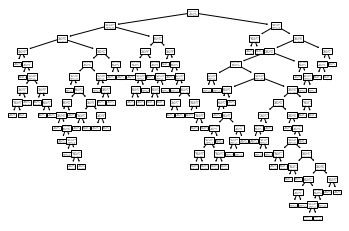

In [ ]:
tree.plot_tree(clf.fit(X, Y));

Given the large distance between training accuracy and testing accuracy, this model is clearly overfitting. To account for this, the model will be refined with a max-depth parameter. It will first be tried on a max-depth of 3,
and then this hyperparameter will be fine-tuned using cross validation.

Decision Tree With Max Depth

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train_res, y_train_res)

In [ ]:
# train error
y_train_pred = clf.predict(X_train_res)
train_acc = clf.score(X_train_res, y_train_res)
train_acc

0.7774936061381074

In [ ]:
# test error
y_pred = clf.predict(X_test)
test_acc = clf.score(X_test, y_test)
test_acc

0.8045112781954887

Max-depth 3 decision tree no longer overfits to the data. There is not a large distance between training and testing accuracy. Also performs slightly better than existing algorithm with accuracy of 70%

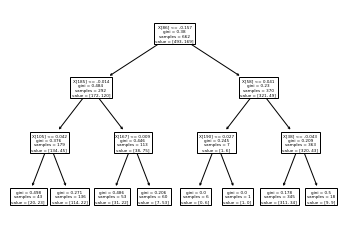

In [ ]:
tree.plot_tree(clf.fit(X, Y));

In [ ]:
features = clf.feature_importances_
features_df = pd.DataFrame(features)
features_df.rename(columns = {0:'Feature Importances'}, inplace = True) 
features_df

,Feature Importances
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
195,0.0
196,0.0
197,0.0
198,0.0


In [ ]:
features_df = features_df.sort_values("Feature Importances", ascending=False)
features_df = features_df.reset_index()
features_df = features_df.rename(columns={"index":"Columns"})
features_df.head(10)

,Columns,Feature Importances
0,86,0.297780
1,185,0.276984
2,167,0.145118
3,105,0.106976
4,58,0.088137
5,38,0.064846
6,190,0.020160
7,0,0.000000
8,136,0.000000
9,129,0.000000


Model Evaluation Metrics

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
# accuracy = correctly predicted observations / total observations
acc = accuracy_score(y_test, y_pred)
acc

0.7518796992481203

In [ ]:
# precision = true_positives / all_predicted_positives
prec = precision_score(y_test, y_pred)
prec
#EX: of all passengers that were labeled as survived, how many actually survived?

0.47368421052631576

In [ ]:
# recall = true_positives / all_actual_positives
recall = recall_score(y_test, y_pred)
recall
#EX: Of all the passengers that truly survived, how many did we label?

0.5806451612903226

In [ ]:
# f1 score = weighted average of precision and recall
f1 = f1_score(y_test, y_pred)
f1

0.5217391304347826

In [ ]:
# cross entropy loss
cross_entropy_loss = log_loss(y_test, y_pred)
cross_entropy_loss

8.56989182692223

Cross-Validated Decision-Tree, Hypertuning Max-Depth Parameter

In [ ]:
#hyperparameter tuning is just adjusting our model (EX: clf) to give us the best results (EX: changing max depth of our decision tree)
for depth in [2, 3, 4, 5, 6]:
  clf = tree.DecisionTreeClassifier(max_depth=depth)
  clf = clf.fit(X_train, y_train)
  scores = cross_val_score(clf, X_train_res, y_train_res, scoring='f1', cv=5)
  print('mean cross validated score for depth {}: {}'.format(depth, np.mean(scores)))

mean cross validated score for depth 2: 0.6632786782337708
mean cross validated score for depth 3: 0.6982832549440989
mean cross validated score for depth 4: 0.7646523316905429
mean cross validated score for depth 5: 0.7854056939713343
mean cross validated score for depth 6: 0.8031978778173684


In [ ]:
#underfitting: model function does not resemble the true function enough (passes through the true function with no regard for the data)
#overfitting: model function captures lots of training data points and resembles true function's curve but just memorized training data
#and cannot be generalized for other types of data we'd input

# Random Forest Regressor
- guide: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

Train Model

In [ ]:
# Instantiate model
rf = RandomForestRegressor(n_estimators= 5, random_state=42)

# Train the model on training data
rf.fit(X_train, y_train);

In [ ]:
# train error
y_train_pred = rf.predict(X_train)
train_acc = rf.score(X_train, y_train)
train_acc

0.7719853163487618

In [ ]:
# test error
y_pred = rf.predict(X_test)
test_acc = rf.score(X_test, y_test)
test_acc

0.11128274951557704

Model is definitely overfitting given the large distance between training and testing error.

Plot tree

In [ ]:
# Pull out one tree from the forest
tree = rf.estimators_[0]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = list(X.columns), rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png'); 

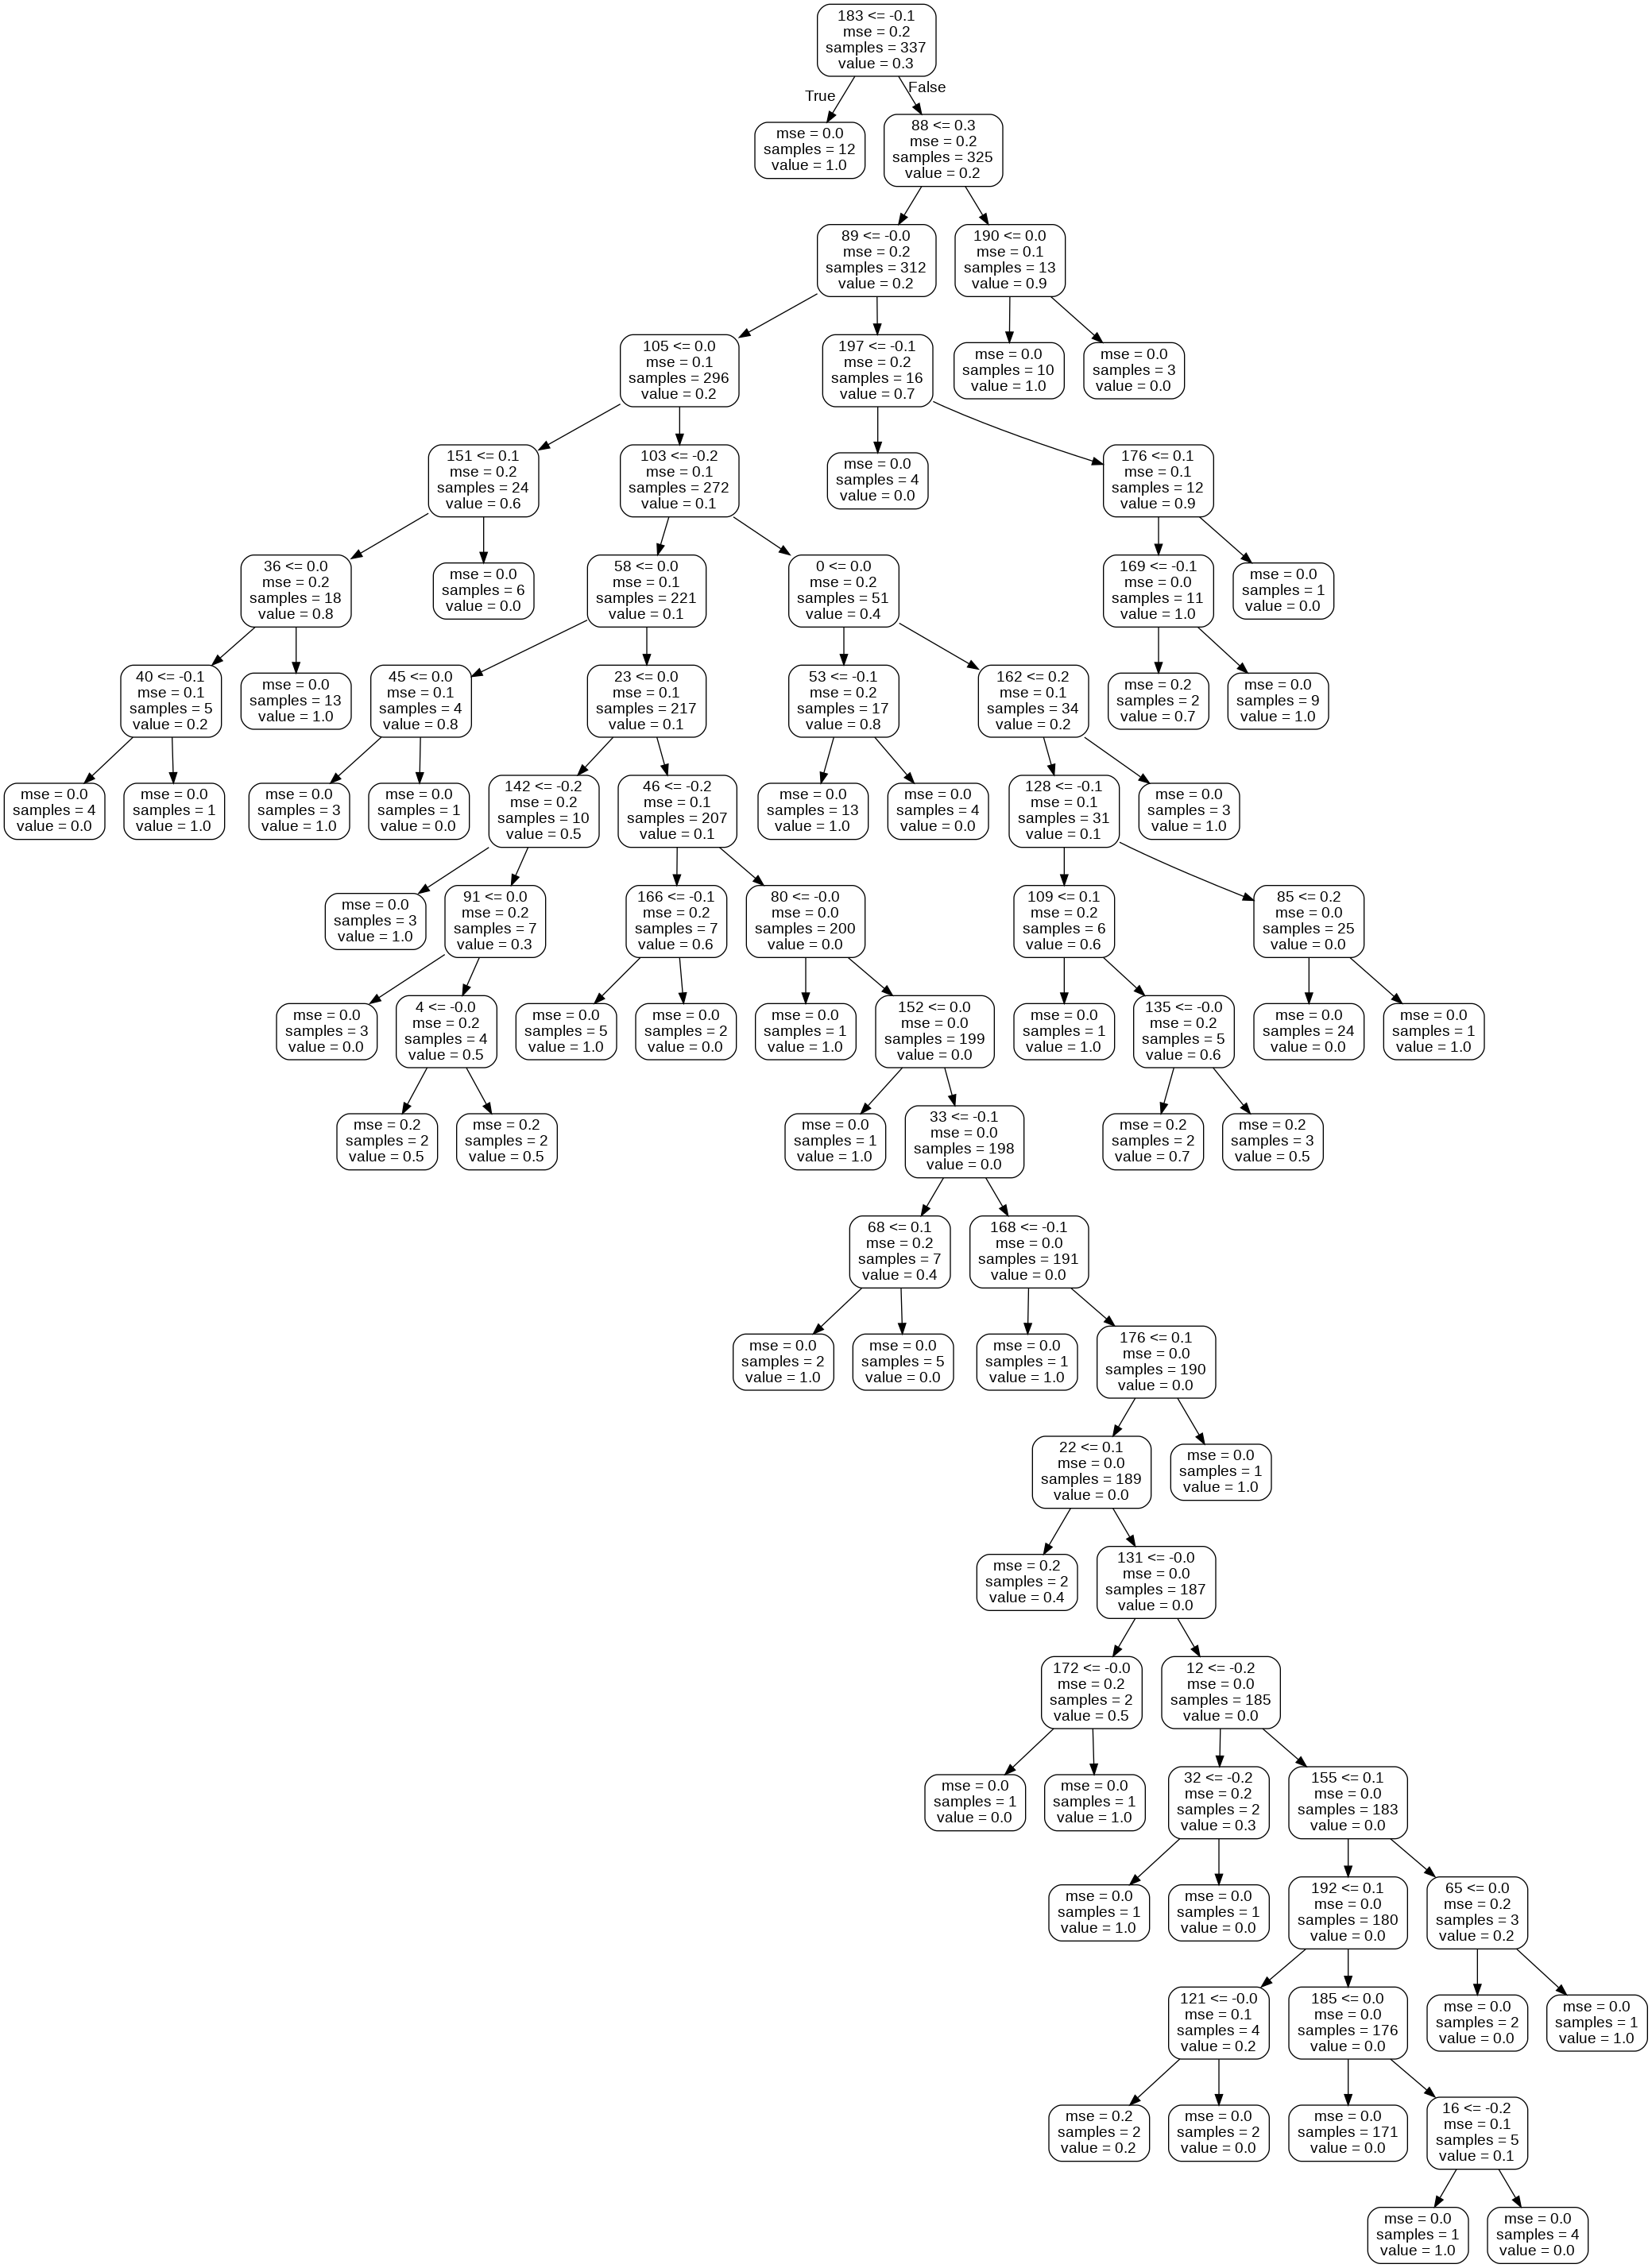

In [ ]:
Image(filename = 'tree.png')
#different tree bc pulled out a random one from the forest

Make Predictions

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.2650125313283208

In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (mae / y_test))
mape

inf

In [ ]:
features = rf.feature_importances_
features_df = pd.DataFrame(features)
features_df.rename(columns = {0:'Feature Importances'}, inplace = True) 
features_df.head(10)

,Feature Importances
0,0.038660
1,0.000000
2,0.000000
3,0.000000
4,0.008058
5,0.000000
6,0.000000
7,0.002867
8,0.000000
9,0.028405


In [ ]:
features_df = features_df.sort_values("Feature Importances", ascending=False)
features_df = features_df.reset_index()
features_df = features_df.rename(columns={"index":"Columns"})
features_df.head(10)

,Columns,Feature Importances
0,0,0.038660
1,88,0.036704
2,15,0.036132
3,86,0.033938
4,23,0.032823
5,34,0.032671
6,178,0.031345
7,91,0.030674
8,9,0.028405
9,183,0.027431


Evaluation Metrics

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred.round())
acc

0.7894736842105263

In [ ]:
prec = precision_score(y_test, y_pred.round())
prec

0.5652173913043478

In [ ]:
recall = recall_score(y_test, y_pred.round())
recall

0.41935483870967744

In [ ]:
f1 = f1_score(y_test, y_pred.round())
f1

0.4814814814814815

In [ ]:
cross_entropy_loss = log_loss(y_test, y_pred)
cross_entropy_loss

2.130550190759088

Hyperparameter Tuning and Cross Val Score -- Attribute Bagging

In [ ]:
depths = np.arange(1, 10)
for depth in depths:
  rf_new = RandomForestRegressor(max_depth=depth, max_features=10)
  rf_new = rf_new.fit(X_train_res, y_train_res)
  scores = cross_val_score(rf_new, X_train, y_train, cv=5)
  print('mean cross validated score for 10 randomly selected features and depth {}: {}'.format(depth, np.mean(scores)))

mean cross validated score for 10 randomly selected features and depth 1: 0.07019535704695463
mean cross validated score for 10 randomly selected features and depth 2: 0.12086340139269106
mean cross validated score for 10 randomly selected features and depth 3: 0.17235831036327792
mean cross validated score for 10 randomly selected features and depth 4: 0.21350281545751057
mean cross validated score for 10 randomly selected features and depth 5: 0.24637390431452535
mean cross validated score for 10 randomly selected features and depth 6: 0.2736405224168859
mean cross validated score for 10 randomly selected features and depth 7: 0.270100059355317
mean cross validated score for 10 randomly selected features and depth 8: 0.2901166236177327
mean cross validated score for 10 randomly selected features and depth 9: 0.29128840456316285


In [ ]:
depths = np.arange(90, 100)
for depth in depths:
  rf_new = RandomForestRegressor(max_depth=depth, max_features=10)
  rf_new = rf_new.fit(X_train, y_train)
  scores = cross_val_score(rf_new, X_train, y_train, cv=5)
  print('mean cross validated score for 10 randomly selected features and depth {}: {}'.format(depth, np.mean(scores)))

mean cross validated score for 10 randomly selected features and depth 90: 0.2665405089873073
mean cross validated score for 10 randomly selected features and depth 91: 0.26656708855305544
mean cross validated score for 10 randomly selected features and depth 92: 0.28876903340145055
mean cross validated score for 10 randomly selected features and depth 93: 0.27443233158815755
mean cross validated score for 10 randomly selected features and depth 94: 0.2760054466448697
mean cross validated score for 10 randomly selected features and depth 95: 0.27045236262866806
mean cross validated score for 10 randomly selected features and depth 96: 0.27127240752993964
mean cross validated score for 10 randomly selected features and depth 97: 0.2666397077991901
mean cross validated score for 10 randomly selected features and depth 98: 0.28300353040420845
mean cross validated score for 10 randomly selected features and depth 99: 0.27243961279982376


## To Ameliorate Overfitting in Random Forest: Reducing Number of Features

Creating new dataframe with top 31 most important features from features_df
NOTE: chose 31 because that's when feature importance score started going into 0.00...

In [ ]:
data_with_vectors2 = data_with_vectors[[0, 88, 15, 86, 23, 34, 178, 91, 9, 183, 191, 185, 89, 180, 140, 199, 105, 184, 83, 155, 136, 60, 
                                        53, 165, 170, 123, 36, 134, 47, 66, 85, 'Eligibility_under_§_101_(abstract)']]
data_with_vectors2

,0,88,15,86,23,34,178,91,9,183,191,185,89,180,140,199,105,184,83,155,136,60,53,165,170,123,36,134,47,66,85,Eligibility_under_§_101_(abstract)
0,0.039431,0.324643,0.145473,-0.155291,0.098246,0.038833,0.038745,0.027152,0.002637,-0.060890,-0.092225,-0.031107,-0.074407,0.057907,0.159402,0.085238,0.084886,-0.050321,0.131250,0.028440,-0.079900,-0.009393,-0.037032,0.067658,-0.012419,-0.036994,0.048469,0.108500,0.143204,0.137917,0.193197,0.0
1,-0.023565,0.301479,0.161266,-0.168907,0.037389,0.070656,0.053030,0.018033,0.005171,-0.060964,-0.134112,-0.020107,-0.106214,0.022487,0.246385,0.116687,0.010399,-0.060797,0.139416,-0.014337,-0.115383,-0.001885,-0.090605,0.096335,-0.035288,-0.031936,0.058666,0.095406,0.126885,0.137125,0.245953,1.0
2,0.012036,0.308293,0.174092,-0.133571,0.090595,0.052147,0.016401,0.030763,-0.015056,-0.051266,-0.130462,-0.006614,-0.105787,0.046965,0.189705,0.064818,0.063855,-0.038989,0.128997,0.030062,-0.053440,-0.009763,-0.021530,0.068639,-0.040948,-0.040641,0.052672,0.094134,0.150498,0.143602,0.234016,0.0
3,0.011056,0.324132,0.156603,-0.133165,0.087849,0.056251,0.033379,0.044322,-0.018876,-0.070278,-0.102003,-0.027674,-0.113681,0.052304,0.194589,0.085526,0.037587,-0.037772,0.125535,0.020056,-0.075156,-0.006469,-0.036611,0.088779,-0.046227,-0.052272,0.057309,0.085093,0.161511,0.140824,0.225387,0.0
4,0.024540,0.321873,0.170524,-0.152882,0.105452,0.060869,0.032102,0.029210,0.000309,-0.067996,-0.106702,-0.032931,-0.094270,0.055730,0.178661,0.096252,0.045564,-0.060522,0.128662,0.017328,-0.078578,-0.006659,-0.028066,0.060901,-0.047568,-0.055299,0.048687,0.094840,0.158380,0.124063,0.224378,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,-0.008601,0.286482,0.152345,-0.177214,0.056992,0.059730,0.048336,0.012879,-0.004288,-0.069091,-0.140021,-0.024158,-0.089596,0.008617,0.181793,0.081554,0.066732,-0.054331,0.122967,0.010136,-0.059106,0.010833,-0.042787,0.098268,-0.065367,0.017959,0.060741,0.037059,0.114022,0.117417,0.241724,0.0
658,0.022674,0.345905,0.197055,-0.138179,0.074388,0.079586,0.049701,0.013343,0.016850,-0.090683,-0.088142,-0.016997,-0.079005,0.025823,0.187116,0.110180,0.052636,-0.040216,0.130463,0.011755,-0.096906,-0.016137,-0.050177,0.094332,-0.031247,-0.000131,0.049308,0.072939,0.148594,0.110395,0.227943,0.0
659,-0.005414,0.327009,0.185184,-0.144564,0.086838,0.052305,0.070232,0.037410,0.026408,-0.113097,-0.069643,-0.026192,-0.063764,0.046014,0.202938,0.103099,0.049122,-0.052243,0.167467,-0.016476,-0.097797,-0.022042,-0.047388,0.069569,-0.026630,-0.009304,0.058160,0.106623,0.136816,0.131872,0.224399,1.0
660,0.014721,0.342822,0.173643,-0.177045,0.057154,0.070390,0.043570,0.026843,0.007995,-0.064995,-0.089360,-0.034529,-0.104461,0.043939,0.195084,0.097149,0.036837,-0.045855,0.131543,0.028502,-0.085608,-0.016662,-0.068226,0.092197,-0.064740,-0.007301,0.071838,0.097347,0.131096,0.112729,0.170454,0.0


Resplitting

In [ ]:
important_X = data_with_vectors2.drop(columns="Eligibility_under_§_101_(abstract)")
important_Y = data_with_vectors2["Eligibility_under_§_101_(abstract)"]

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(important_X, important_Y, test_size=0.2, random_state=42)

In [ ]:
# Instantiate model
rf = RandomForestRegressor(n_estimators= 5, random_state=42)

# Train the model on training data
rf.fit(X_train2, y_train2);

In [ ]:
# train error
y_train_pred2 = rf.predict(X_train2)
train_acc2 = rf.score(X_train2, y_train2)
train_acc2

0.7880838001867414

In [ ]:
# test error
y_pred2 = rf.predict(X_test2)
test_acc2 = rf.score(X_test2, y_test2)
test_acc2

0.01850796210957517

Model Evaluation Metrics

In [ ]:
y_pred2 = rf.predict(X_test2)

In [ ]:
acc = accuracy_score(y_test, y_pred2.round())
prec = precision_score(y_test, y_pred2.round())
recall = recall_score(y_test, y_pred2.round())
f1 = f1_score(y_test, y_pred2.round())
acc, prec, recall, f1

(0.6917293233082706,
 0.3611111111111111,
 0.41935483870967744,
 0.3880597014925373)

# Logistic Regression

guide: https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python 

In [ ]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train_res,y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_train_pred = logreg.predict(X_train_res)
train_acc = logreg.score(X_train_res, y_train_res)
train_acc

0.6879795396419437

In [ ]:
y_pred = logreg.predict(X_test)
test_acc = logreg.score(X_test, y_test)
test_acc

0.706766917293233

Good distance between training and testing accuracy!

Model Evaluation Metrics

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
#confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[76, 26],
       [13, 18]])

Text(0.5, 257.44, 'Predicted label')

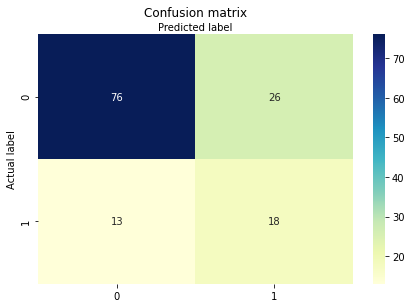

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
acc, prec, recall, f1

(0.706766917293233, 0.4090909090909091, 0.5806451612903226, 0.4800000000000001)

ROC Curve

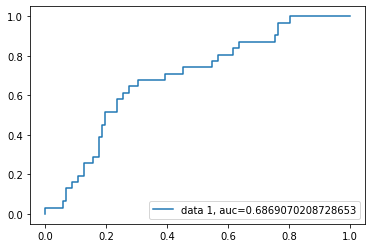

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
mae2 = mean_absolute_error(y_test, y_pred)
mae2

0.2932330827067669

In [ ]:
mape2 = np.mean(100 * (mae2 / y_test))
mape2

inf

# Statistical Tests

guide: featurecomparisons.pdf on AWS Server

In [ ]:
valids = data.loc[data_with_vectors['Eligibility_under_§_101_(abstract)'] == 1]
invalids = data.loc[data_with_vectors['Eligibility_under_§_101_(abstract)'] == 0]

In [ ]:
def prop_diff(data, feature, classes='Eligibility_under_§_101_(abstract)'):
 '''
 Computes a single test statistic as the absolute difference
 in proportion of FEATURE in CLASSES from DATA

 Args:
 data : a pandas dataframe including FEATURE and CLASSES
as columns
 feature : the column on which to compute the difference
 Options:
 classes : the column which classifies the two patent gro
ups (valid
 and invalid)
 Returns a float, the absolute difference of FEATURE proporti
on in CLASSES
 '''
 class_arr = data[classes]
 props = data[[classes, feature]].groupby(classes).mean()
 diff = abs(props[feature][0] - props[feature][1])
 return diff

In [ ]:
def test_feature(data, feature, nreps=1000, classes='Eligibility_under_§_101_(abstract)'):
 '''
 Tests a single FEATURE for if it has a statistically significant absolute
 difference in proportions across the two classes of patents (valid and
 invalid, which are encoded as 1 and 0 respectively in CLASSES)

 Args:
 data : a pandas dataframe including FEATURE and CLASSES as columns
 feature : the column on which to compute the difference
 Options:
 classes : the column which classifies the two patent gro
 classes : the column which classifies the two patent groups (valid and invalid)
 Returns a float, the p-value quantifying the statistical sig nificance of
 the absolute difference in FEATURE proportions in CLASSES
 '''

 differences = -1*np.ones((nreps,))

 # get observed test stat
 obs_test_stat = prop_diff(data, feature, classes=classes)
 length_feature = data.shape[0]

 for i in range(nreps):
   # reshuffle data
   shuffled_features = data[feature].sample(length_feature, replace=True)
   shuffled_data = data[[classes]]
   shuffled_data.loc[:,feature] = np.array(shuffled_features)
   
   # get simulated test stat, add it to the differences array
   sim_diff = prop_diff(shuffled_data, feature, classes=classes)
   differences[i] = sim_diff

 # calculate p-value of statistical significance between categories
 p_val = np.count_nonzero(differences >= obs_test_stat) / nreps
 return p_val

In [ ]:
def kolmogorov_smirnov_test_feature_D(data, feature):
 valid_data = data.loc[data['Eligibility_under_§_101_(abstract)'] == 1]
 invalid_data = data.loc[data['Eligibility_under_§_101_(abstract)'] == 0]
 D, p = ks_2samp(invalid_data[feature], valid_data[feature])
 return D

In [ ]:
def kolmogorov_smirnov_test_feature_p(data, feature):
 valid_data = data.loc[data['Eligibility_under_§_101_(abstract)'] == 1]
 invalid_data = data.loc[data['Eligibility_under_§_101_(abstract)'] == 0]
 D, p = ks_2samp(invalid_data[feature], valid_data[feature])
 return p

In [ ]:
kolmogorov_smirnov_test_feature_D(data_with_vectors, 0)

0.23103328252337457

In [ ]:
kolmogorov_smirnov_test_feature_p(data_with_vectors, 0)

2.161734235617274e-06

In [ ]:
arr_features = data_with_vectors.drop(columns = ['Number of headings', 'DETAILED in heading','Number of Paragraphs', 
                                      'Figure Count','Digit/Decimal Count','Excluding Phrase Count', 
                                      'Semicolon Count','Number of Backward Citations', 
                                      'Number of Forward Citations','Wherein Count', 'Said Count', 
                                      'Examiner Rate','Examiner Count', "Eligibility_under_§_101_(abstract)", "Pre-processed Text"])

KS Test

In [ ]:
pvals_D = list()
for feat in arr_features:
  p_val = kolmogorov_smirnov_test_feature_D(data_with_vectors, feat)
  pvals_D = np.append(pvals_D, p_val)
pvals_D

array([0.23103328, 0.1204076 , 0.09857532, 0.23557017, 0.10020764,
       0.14225188, 0.08188005, 0.06884549, 0.13802705, 0.08652496,
       0.18386404, 0.13093366, 0.10011162, 0.09646291, 0.21997912,
       0.08767718, 0.16748083, 0.12176387, 0.17350601, 0.10135987,
       0.15292197, 0.10805718, 0.147977  , 0.06969766, 0.14628467,
       0.12632476, 0.12094771, 0.14356014, 0.11319419, 0.16572848,
       0.06650503, 0.16047145, 0.08540874, 0.11044565, 0.15977532,
       0.07248221, 0.09395442, 0.22728855, 0.13665879, 0.0882773 ,
       0.1586591 , 0.10167193, 0.22391589, 0.10179195, 0.1209117 ,
       0.07094591, 0.10282415, 0.13965937, 0.09261015, 0.09912743,
       0.16739681, 0.11756304, 0.09807122, 0.25638225, 0.13716288,
       0.27409772, 0.18277182, 0.08394445, 0.08100388, 0.13449836,
       0.09894739, 0.07680305, 0.1551064 , 0.15040148, 0.10230805,
       0.11199395, 0.13983941, 0.15946325, 0.18334794, 0.04901761,
       0.08031974, 0.07699509, 0.17267784, 0.1219439 , 0.16081

In [ ]:
pvals_p = list()
for feat in arr_features:
  p_val = kolmogorov_smirnov_test_feature_p(data_with_vectors, feat)
  pvals_p = np.append(pvals_p, p_val)
pvals_p

array([2.16173424e-06, 4.71080177e-02, 1.59950198e-01, 1.26263684e-06,
       1.46911605e-01, 1.08383158e-02, 3.44820127e-01, 5.60921435e-01,
       1.46721778e-02, 2.82280141e-01, 3.33308602e-04, 2.38912543e-02,
       1.48023508e-01, 1.77527699e-01, 7.89973953e-06, 2.68350577e-01,
       1.45783688e-03, 4.33135935e-02, 8.67568174e-04, 1.38572229e-01,
       4.82701850e-03, 9.69454240e-02, 7.09618260e-03, 5.45246733e-01,
       8.06081256e-03, 3.24261393e-02, 4.55171326e-02, 9.85979837e-03,
       7.23290921e-02, 1.70561547e-03, 6.04409979e-01, 2.64488678e-03,
       2.96974328e-01, 8.48358514e-02, 2.79590155e-03, 4.94777192e-01,
       2.00456892e-01, 3.39242331e-06, 1.61743001e-02, 2.61619022e-01,
       3.05835620e-03, 1.36496164e-01, 5.00683377e-06, 1.35663657e-01,
       4.56614556e-02, 5.22200512e-01, 1.28595519e-01, 1.30699619e-02,
       2.13721943e-01, 1.55601050e-01, 1.47779633e-03, 5.59722879e-02,
       1.64083391e-01, 8.86351290e-08, 1.56156541e-02, 7.84113086e-09,
      

In [ ]:
ks_vals = Table()
ks_vals = ks_vals.with_column("Column", arr_features)
ks_vals = ks_vals.with_columns("D", pvals_D, "p", pvals_p)
ks_vals

Column,D,p
0,0.231033,2.16173e-06
1,0.120408,0.047108
2,0.0985753,0.15995
3,0.23557,1.26264e-06
4,0.100208,0.146912
5,0.142252,0.0108383
6,0.08188,0.34482
7,0.0688455,0.560921
8,0.138027,0.0146722
9,0.086525,0.28228


Feature Importances Based on Statistical Significance

In [ ]:
test_feature(data_with_vectors, 1)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


0.506

In [ ]:
test_features = list()
for feat in arr_features:
  val = test_feature(data_with_vectors, feat)
  test_features = np.append(test_features, val)
test_features

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


array([0.   , 0.517, 0.376, 0.   , 0.515, 0.012, 0.733, 0.535, 0.048,
       0.663, 0.008, 0.023, 0.645, 0.276, 0.014, 0.022, 0.   , 0.119,
       0.015, 0.609, 0.051, 0.563, 0.038, 0.545, 0.495, 0.599, 0.005,
       0.139, 0.062, 0.009, 0.424, 0.011, 0.411, 0.003, 0.001, 0.562,
       0.097, 0.   , 0.181, 0.261, 0.009, 0.504, 0.   , 0.121, 0.015,
       0.638, 0.014, 0.001, 0.876, 0.072, 0.008, 0.38 , 0.158, 0.   ,
       0.   , 0.   , 0.   , 0.229, 0.274, 0.01 , 0.054, 0.043, 0.045,
       0.105, 0.068, 0.386, 0.002, 0.   , 0.035, 0.259, 0.588, 0.856,
       0.009, 0.001, 0.   , 0.   , 0.   , 0.012, 0.444, 0.989, 0.305,
       0.375, 0.001, 0.166, 0.957, 0.003, 0.   , 0.797, 0.131, 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.928, 0.07 , 0.435, 0.17 , 0.053,
       0.947, 0.075, 0.011, 0.068, 0.024, 0.228, 0.   , 0.   , 0.008,
       0.001, 0.194, 0.001, 0.075, 0.172, 0.087, 0.   , 0.114, 0.   ,
       0.17 , 0.168, 0.544, 0.002, 0.917, 0.001, 0.202, 0.   , 0.111,
       0.003, 0.336,

In [ ]:
stat_sig = Table()
stat_sig = stat_sig.with_columns("Column", arr_features, 
                                 "Test Feature", test_features)
stat_sig
#above cell takes a while to run

Column,Test Feature
0,0
1,0.517
2,0.376
3,0
4,0.515
5,0.012
6,0.733
7,0.535
8,0.048
9,0.663


In [ ]:
stat_sig.sort("Test Feature", descending=True)

Column,Test Feature
79,0.989
196,0.958
84,0.957
159,0.953
99,0.947
94,0.928
121,0.917
195,0.911
48,0.876
143,0.874
